## Heart Sound Segmentation using Deep Learning
- Dataset link : http://www.peterjbentley.com/heartchallenge/
- Tut: https://www.analyticsvidhya.com/blog/2017/11/heart-sound-segmentation-deep-learning/

In [19]:
# import modules%pylab inline

import librosa
import numpy as np
import pandas as pd
from librosa import display


In [21]:
# read csv 
df = pd.read_csv('Atraining_normal_seg.csv')
df.head()


,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


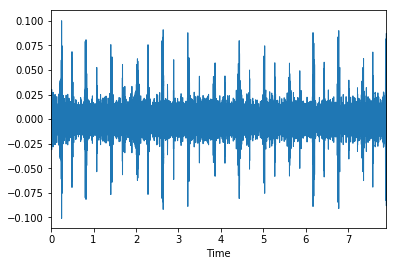

In [25]:
# load wav file
sampledata, sampling_rate = librosa.load('Atraining_normal/201102081321.wav', sr=44100 )
display.waveplot(sampledata, sr=sampling_rate)


#### Feature extraction
- Create training data from the raw files. 
- The code below does this simply by going though all the raw files.
- Extracting a part of the audio along with its respective label

In [42]:
# create training data
data_x = []
data_y = []
for j in range(df.shape[0]):
    for  i in range(1, df.shape[1] - 1):
        try: 
            data, sampling_rate = librosa.load('Atraining_normal/'+ df.iloc[j, 0].split('.')[0] +'.wav', sr=44100 )
            temp_data = data[int(df.iloc[j, i]):int(df.iloc[j, i+1])]
            temp_label = df.iloc[:, i].name.split('.')[0]
 
            data_x.append(temp_data)
            data_y.append(temp_label)
        except:
            pass


### Preprocessing for features
- Make all the the extracted samples of same shape.
- Normalize the data 
- Create appropriate X and Y for our deep learning model.


In [43]:
data_x


[array([ 0.04660034,  0.04782104,  0.04705811, ..., -0.00949097,
        -0.00958252, -0.00964355], dtype=float32),
 array([-0.00985718, -0.00878906, -0.00765991, ...,  0.00286865,
         0.00210571,  0.00265503], dtype=float32),
 array([0.00299072, 0.00283813, 0.00128174, ..., 0.03060913, 0.03012085,
        0.03015137], dtype=float32),
 array([ 0.02893066,  0.02874756,  0.02755737, ..., -0.02035522,
        -0.02197266, -0.02371216], dtype=float32),
 array([-0.02474976, -0.02572632, -0.02612305, ...,  0.05264282,
         0.05218506,  0.05221558], dtype=float32),
 array([ 0.04907227,  0.04702759,  0.04559326, ..., -0.01168823,
        -0.01211548, -0.01251221], dtype=float32),
 array([-0.01397705, -0.0138855 , -0.01464844, ..., -0.00848389,
        -0.00839233, -0.01043701], dtype=float32),
 array([-0.01107788, -0.01269531, -0.01275635, ..., -0.02087402,
        -0.02053833, -0.02075195], dtype=float32),
 array([-0.02175903, -0.02468872, -0.02593994, ..., -0.00714111,
        -0.00

In [44]:
data_y

['S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',
 'S1',
 'S2',

In [45]:
# preprocessing
from keras.preprocessing.sequence import pad_sequences

# step 1
data_x = pad_sequences(data_x, maxlen=20000, dtype='float', padding='post', truncating='post', value=0.)

# step 2
data_x = data_x / np.max(data_x)

# step 3
data_x = data_x[:,:,np.newaxis]
data_y = pd.Series(data_y)
data_y.value_counts()

data_y = data_y.map({'S1':0, 'S2':1}).values


In [47]:
data_x.shape

(369, 20000, 1)

In [48]:
data_y.shape

(369,)

### CNN Model 

In [50]:
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPool1D
from keras.models import Sequential

model = Sequential()

model.add(InputLayer(input_shape=data_x.shape[1:]))

model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Flatten())
model.add(Dense(units=1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 19991, 50)         550       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2499, 50)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2490, 50)          25050     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 312, 50)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15601     
Total params: 41,201
Trainable params: 41,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train 
model.fit(data_x, data_y, batch_size=64, epochs=10)

Epoch 1/10
369/369 [==============================] - 4s 12ms/step - loss: 8.3384 - acc: 0.4770
Epoch 2/10
369/369 [==============================] - 4s 12ms/step - loss: 8.3384 - acc: 0.4770
Epoch 3/10
369/369 [==============================] - 4s 12ms/step - loss: 8.3384 - acc: 0.4770
Epoch 4/10
128/369 [=========>....................] - ETA: 2s - loss: 8.2203 - acc: 0.4844